# Preparación proyecto

## Librerías

In [1]:
# Python
import pandas as pd 
import numpy as np
from scipy.stats import trim_mean
from numpy import mean, absolute 
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import prince # for multiple correspondence analysis
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from datetime import datetime

## Datos Mas Familias Accion

In [2]:
data = pd.read_csv("/datasets/csv-familias/Beneficiarios_M_s_Familias_en_Acci_n.csv")

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3135: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Datos Indice Desarrollo Humano departamental

In [3]:
idh = pd.read_csv('/datasets/csv-familias/idh_dep.csv')
idh['IDH'] = idh['IDH'].str.replace(',','.').astype('float')

### Estandariza texto

In [4]:
idh['Departamento'] = idh['Departamento'].str.replace('á','a')
idh['Departamento'] = idh['Departamento'].str.replace('é','e')
idh['Departamento'] = idh['Departamento'].str.replace('í','i')
idh['Departamento'] = idh['Departamento'].str.replace('ó','o')
idh['Departamento'] = idh['Departamento'].str.replace('ú','u')
idh['Departamento'] = idh['Departamento'].apply(lambda x: x.strip())
idh['Departamento'] = idh['Departamento'].apply(lambda x: str.upper(x))
idh['Departamento'] = idh['Departamento'].str.replace('SAN ANDRES Y PROVIDENCIA','SAN ANDRES')
idh['Departamento'] = idh['Departamento'].str.replace('VALLE DEL CAUCA','VALLE')

### Binning IDH

In [5]:
idh['rango_idh'] = pd.cut(idh['IDH'],4)
idh

,Departamento,IDH,rango_idh
0,BOGOTA,0.813,"(0.77, 0.813]"
1,VALLE,0.791,"(0.77, 0.813]"
2,SAN ANDRES,0.789,"(0.77, 0.813]"
3,ATLANTICO,0.786,"(0.77, 0.813]"
4,QUINDIO,0.784,"(0.77, 0.813]"
5,CALDAS,0.778,"(0.77, 0.813]"
6,META,0.778,"(0.77, 0.813]"
7,SANTANDER,0.778,"(0.77, 0.813]"
8,CUNDINAMARCA,0.774,"(0.77, 0.813]"
9,ANTIOQUIA,0.772,"(0.77, 0.813]"


# Ajustes de columnas del conjunto de datos, preprocesamiento inicial

### Conversión tipo float CantidadDeBeneficiarios

In [6]:
data.CantidadDeBeneficiarios = data.CantidadDeBeneficiarios.str.replace(',','')
data.CantidadDeBeneficiarios = data.CantidadDeBeneficiarios.astype(float)

# Remueven datos sin cantidad de beneficiarios.
data.dropna(subset=['CantidadDeBeneficiarios'],inplace = True)

## Agrupación de valores similares

### Etnia

In [7]:
data.Etnia = data.Etnia.str.replace('^AFRO.*', 'AFROCOLOMBIANO', regex=True)
data.Etnia = data.Etnia.str.replace('ROM O GITANO', 'ROM', regex=True)

In [8]:
data.Etnia.unique()

array(['AFROCOLOMBIANO', 'INDIGENA', 'ND', 'MESTIZO', 'RAIZAL',
       'PALENQUERO', 'ROM'], dtype=object)

### Pais

In [9]:
data.Pais = data.Pais.str.replace('^C.*', 'Colombia', regex=True)
data.Pais = data.Pais.str.replace('^\d.*', 'Colombia', regex=True)

## Eliminación columnas sin valor informativo

### Pais y TipoAsignacionBeneficio

In [10]:
data.Pais.unique()

array(['ND', 'Colombia'], dtype=object)

In [11]:
data.TipoAsignacionBeneficio.unique()

array(['MONETARIO', 'ND'], dtype=object)

In [12]:
data.drop('Pais', axis=1, inplace=True)
data.drop('TipoAsignacionBeneficio', axis=1, inplace=True)

## Datos duplicados

In [13]:
dups = data[data.duplicated()==True]
dups

,Bancarizado,CodigoDepartamentoAtencion,CodigoMunicipioAtencion,Discapacidad,EstadoBeneficiario,Etnia,FechaInscripcionBeneficiario,Genero,NivelEscolaridad,NombreDepartamentoAtencion,NombreMunicipioAtencion,TipoBeneficio,TipoDocumento,TipoPoblacion,RangoBeneficioConsolidadoAsignado,RangoUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado,RangoEdad,Titular,CantidadDeBeneficiarios
2,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1.0
3,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1.0
4,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO,2012-12-01,Hombre,ND,ATLANTICO,LURUACO,ND,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1.0
22,NO,13,13442,NO,NO ACTIVO,ND,2012-12-01,Mujer,ND,BOLIVAR,MARIA LA BAJA,ND,CC,ND,1.500.001 - 3.000.000,0 - 1.300.000,2014-01-01,30-49,SI,2.0
53,SI,23,23574,NO,NO ACTIVO,ND,2013-01-01,Mujer,ND,CORDOBA,PUERTO ESCONDIDO,ND,CC,ND,1.500.001 - 3.000.000,0 - 1.300.000,2014-01-01,30-49,SI,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981311,ND,47,47555,ND,ACTIVO,ND,2012-11-01,Mujer,ND,MAGDALENA,PLATO,NUTRICIÓN,CC,DESPLAZADOS,> 6.000.001,0 - 1.300.000,2018-01-01,30-49,SI,1.0
3981328,ND,5,5040,ND,ACTIVO,ND,2012-11-01,Mujer,ND,ANTIOQUIA,ANORI,ND,CC,DESPLAZADOS,0 - 1.500.000,0 - 1.300.000,2018-01-01,50-65,SI,1.0
3981369,ND,47,47268,ND,ACTIVO,ND,2012-11-01,Mujer,ND,MAGDALENA,EL RETEN,NUTRICIÓN,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,18-29,SI,1.0
3981370,ND,47,47268,ND,ACTIVO,ND,2012-11-01,Mujer,ND,MAGDALENA,EL RETEN,NUTRICIÓN,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,18-29,SI,1.0


In [14]:
data.columns

Index(['Bancarizado', 'CodigoDepartamentoAtencion', 'CodigoMunicipioAtencion',
       'Discapacidad', 'EstadoBeneficiario', 'Etnia',
       'FechaInscripcionBeneficiario', 'Genero', 'NivelEscolaridad',
       'NombreDepartamentoAtencion', 'NombreMunicipioAtencion',
       'TipoBeneficio', 'TipoDocumento', 'TipoPoblacion',
       'RangoBeneficioConsolidadoAsignado', 'RangoUltimoBeneficioAsignado',
       'FechaUltimoBeneficioAsignado', 'RangoEdad', 'Titular',
       'CantidadDeBeneficiarios'],
      dtype='object')

### Agrupación datos repetidos por CantidadDeBeneficiarios

In [15]:
data = data.groupby(['Bancarizado', 'CodigoDepartamentoAtencion', 'CodigoMunicipioAtencion',
       'Discapacidad', 'EstadoBeneficiario', 'Etnia',
       'FechaInscripcionBeneficiario', 'Genero', 'NivelEscolaridad',
       'NombreDepartamentoAtencion', 'NombreMunicipioAtencion',
       'TipoBeneficio', 'TipoDocumento', 'TipoPoblacion',
       'RangoBeneficioConsolidadoAsignado', 'RangoUltimoBeneficioAsignado',
       'FechaUltimoBeneficioAsignado', 'RangoEdad', 'Titular']).sum('CantidadDeBeneficiarios').reset_index()

In [16]:
data.shape[0]

842965

## Unión MFA y IDH

Todos los valores quedan con IDH asociado al departamento correspondiente.

In [17]:
data = data.merge(idh,left_on= 'NombreDepartamentoAtencion',right_on= 'Departamento',how = 'left').drop(columns='Departamento')
data.head()

,Bancarizado,CodigoDepartamentoAtencion,CodigoMunicipioAtencion,Discapacidad,EstadoBeneficiario,Etnia,FechaInscripcionBeneficiario,Genero,NivelEscolaridad,NombreDepartamentoAtencion,...,TipoDocumento,TipoPoblacion,RangoBeneficioConsolidadoAsignado,RangoUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado,RangoEdad,Titular,CantidadDeBeneficiarios,IDH,rango_idh
0,ND,5,5001,ND,ACTIVO,AFROCOLOMBIANO,2012-10-01,Hombre,ND,ANTIOQUIA,...,TI,DESPLAZADOS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,1.0,0.772,"(0.77, 0.813]"
1,ND,5,5001,ND,ACTIVO,AFROCOLOMBIANO,2012-10-01,Mujer,ND,ANTIOQUIA,...,CC,DESPLAZADOS,1.500.001 - 3.000.000,0 - 1.300.000,2018-01-01,50-65,SI,1.0,0.772,"(0.77, 0.813]"
2,ND,5,5001,ND,ACTIVO,AFROCOLOMBIANO,2013-01-01,Hombre,ND,ANTIOQUIA,...,RC,UNIDOS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,1.0,0.772,"(0.77, 0.813]"
3,ND,5,5001,ND,ACTIVO,AFROCOLOMBIANO,2013-04-01,Mujer,ND,ANTIOQUIA,...,TI,SISBEN,0 - 1.500.000,0 - 1.300.000,1900-01-01,18-29,NO,1.0,0.772,"(0.77, 0.813]"
4,ND,5,5001,ND,ACTIVO,AFROCOLOMBIANO,2013-06-01,Mujer,ND,ANTIOQUIA,...,CC,DESPLAZADOS,3.000.001 - 4.500.000,0 - 1.300.000,2018-01-01,30-49,SI,1.0,0.772,"(0.77, 0.813]"


In [18]:
data[pd.isnull(data.IDH)==True]

,Bancarizado,CodigoDepartamentoAtencion,CodigoMunicipioAtencion,Discapacidad,EstadoBeneficiario,Etnia,FechaInscripcionBeneficiario,Genero,NivelEscolaridad,NombreDepartamentoAtencion,...,TipoDocumento,TipoPoblacion,RangoBeneficioConsolidadoAsignado,RangoUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado,RangoEdad,Titular,CantidadDeBeneficiarios,IDH,rango_idh


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842965 entries, 0 to 842964
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Bancarizado                        842965 non-null  object  
 1   CodigoDepartamentoAtencion         842965 non-null  int64   
 2   CodigoMunicipioAtencion            842965 non-null  int64   
 3   Discapacidad                       842965 non-null  object  
 4   EstadoBeneficiario                 842965 non-null  object  
 5   Etnia                              842965 non-null  object  
 6   FechaInscripcionBeneficiario       842965 non-null  object  
 7   Genero                             842965 non-null  object  
 8   NivelEscolaridad                   842965 non-null  object  
 9   NombreDepartamentoAtencion         842965 non-null  object  
 10  NombreMunicipioAtencion            842965 non-null  object  
 11  TipoBeneficio             

## Datos faltantes

Los datos ND representan 'No Definido' y se reemplazan por NaN para poder aprovechar funciones del DataFrame

In [20]:
data = data.replace('ND',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 842965
Number of attributes = 22
Number of missing values:
	Bancarizado: 80027
	CodigoDepartamentoAtencion: 0
	CodigoMunicipioAtencion: 0
	Discapacidad: 45815
	EstadoBeneficiario: 0
	Etnia: 722049
	FechaInscripcionBeneficiario: 0
	Genero: 292
	NivelEscolaridad: 617697
	NombreDepartamentoAtencion: 0
	NombreMunicipioAtencion: 0
	TipoBeneficio: 436360
	TipoDocumento: 0
	TipoPoblacion: 33460
	RangoBeneficioConsolidadoAsignado: 0
	RangoUltimoBeneficioAsignado: 0
	FechaUltimoBeneficioAsignado: 0
	RangoEdad: 0
	Titular: 0
	CantidadDeBeneficiarios: 0
	IDH: 0
	rango_idh: 0


En genero aplicamos el fillna usando la moda de la variable

In [21]:
print(data[pd.isnull(data.Genero)==True].head())
moda_gen = statistics.mode(data['Genero'])
print(moda_gen)
data['Genero'] = data['Genero'].fillna(moda_gen)


     Bancarizado  CodigoDepartamentoAtencion  CodigoMunicipioAtencion  \
1122         NaN                           5                     5044   
1317         NaN                           5                     5045   
1320         NaN                           5                     5045   
2958         NaN                           5                     5313   
3763         NaN                           5                     5495   

     Discapacidad EstadoBeneficiario Etnia FechaInscripcionBeneficiario  \
1122           NO             ACTIVO   NaN                   2012-12-01   
1317           NO             ACTIVO   NaN                   2014-02-01   
1320           NO             ACTIVO   NaN                   2014-11-01   
2958          NaN             ACTIVO   NaN                   2012-11-01   
3763           NO             ACTIVO   NaN                   2012-11-01   

     Genero NivelEscolaridad NombreDepartamentoAtencion  ... TipoDocumento  \
1122    NaN              NaN    

In [72]:
print(data[pd.isnull(data.Genero)==True].head())
data.groupby('Genero').size()

Empty DataFrame
Columns: [Bancarizado, Discapacidad, EstadoBeneficiario, Etnia, FechaInscripcionBeneficiario, Genero, NivelEscolaridad, TipoBeneficio, TipoDocumento, TipoPoblacion, RangoBeneficioConsolidadoAsignado, RangoUltimoBeneficioAsignado, FechaUltimoBeneficioAsignado, RangoEdad, Titular, CantidadDeBeneficiarios, IDH, rango_idh, DepartamentoAtencion, MunicipioAtencion, Rango_cant_ben]
Index: []

[0 rows x 21 columns]


Genero
Hombre    339998
Mujer     502967
dtype: int64

## Conversión tipo fecha

### FechaInscripcionBeneficiario y FechaUltimoBeneficioAsignado

In [23]:
data['FechaInscripcionBeneficiario'] = pd.to_datetime(data['FechaInscripcionBeneficiario'],format="%Y/%m/%d")
data['FechaUltimoBeneficioAsignado'] = pd.to_datetime(data['FechaUltimoBeneficioAsignado'],format="%Y/%m/%d")

### Reemplazar nulos en fechas

Remover los nulos en fechas, que tiene  valor default '1900-01-01', uno reemplazo con nulos, ya que es la fecha de ultima asignación de beneficio, si lo reemplazamos por una moda o una media, podría generar incongruencias como que el beneficio asginado, sea menor que el ultimo recibido, el otro si aplicamos un replace por la moda.

In [24]:
nulo_date = datetime.strptime('1900-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
data['FechaUltimoBeneficioAsignado'].replace(nulo_date,np.nan,inplace=True)
data['FechaInscripcionBeneficiario'].replace(nulo_date,statistics.mode(data['FechaInscripcionBeneficiario']),inplace=True)

## Unión columnas de mismo valor informativo

### CodigoDepartamentoAtencion y NombreDepartamentoAtencion

In [25]:
data.CodigoDepartamentoAtencion = data.CodigoDepartamentoAtencion.astype(str)

In [26]:
data['DepartamentoAtencion'] = data['CodigoDepartamentoAtencion'] +" - "+ data['NombreDepartamentoAtencion']

In [27]:
data['DepartamentoAtencion']

0         5 - ANTIOQUIA
1         5 - ANTIOQUIA
2         5 - ANTIOQUIA
3         5 - ANTIOQUIA
4         5 - ANTIOQUIA
              ...      
842960     99 - VICHADA
842961     99 - VICHADA
842962     99 - VICHADA
842963     99 - VICHADA
842964     99 - VICHADA
Name: DepartamentoAtencion, Length: 842965, dtype: object

In [28]:
data.drop('CodigoDepartamentoAtencion', axis=1, inplace=True)
data.drop('NombreDepartamentoAtencion', axis=1, inplace=True)

### CodigoMunicipioAtencion y NombreMunicipioAtencion

In [29]:
data.CodigoMunicipioAtencion = data.CodigoMunicipioAtencion.astype(str)

In [30]:
data['MunicipioAtencion'] = data['CodigoMunicipioAtencion'] +" - "+ data['NombreMunicipioAtencion']

In [31]:
data['MunicipioAtencion']

0          5001 - MEDELLIN
1          5001 - MEDELLIN
2          5001 - MEDELLIN
3          5001 - MEDELLIN
4          5001 - MEDELLIN
                ...       
842960    99773 - CUMARIBO
842961    99773 - CUMARIBO
842962    99773 - CUMARIBO
842963    99773 - CUMARIBO
842964    99773 - CUMARIBO
Name: MunicipioAtencion, Length: 842965, dtype: object

In [32]:
data.drop('CodigoMunicipioAtencion', axis=1, inplace=True)
data.drop('NombreMunicipioAtencion', axis=1, inplace=True)

## Conversión tipo category

La mayoría de las columnas son registros categóricos por lo que se convierten de una vez para beneficio computacional

In [33]:
data.nunique()

Bancarizado                             2
Discapacidad                            2
EstadoBeneficiario                      3
Etnia                                   6
FechaInscripcionBeneficiario           75
Genero                                  2
NivelEscolaridad                        7
TipoBeneficio                           9
TipoDocumento                           5
TipoPoblacion                           5
RangoBeneficioConsolidadoAsignado       5
RangoUltimoBeneficioAsignado            3
FechaUltimoBeneficioAsignado            6
RangoEdad                               6
Titular                                 2
CantidadDeBeneficiarios              1277
IDH                                    27
rango_idh                               4
DepartamentoAtencion                   33
MunicipioAtencion                    1110
dtype: int64

In [34]:
data.Bancarizado = data.Bancarizado.astype('category')
data.Discapacidad = data.Discapacidad.astype('category')
data.EstadoBeneficiario = data.EstadoBeneficiario.astype('category')
data.Etnia = data.Etnia.astype('category')
data.Genero = data.Genero.astype('category')
data.NivelEscolaridad = data.NivelEscolaridad.astype('category')
data.TipoBeneficio = data.TipoBeneficio.astype('category')
data.TipoDocumento = data.TipoDocumento.astype('category')
data.TipoPoblacion = data.TipoPoblacion.astype('category')
data.RangoBeneficioConsolidadoAsignado = data.RangoBeneficioConsolidadoAsignado.astype('category')
data.RangoUltimoBeneficioAsignado = data.RangoUltimoBeneficioAsignado.astype('category')
data.RangoEdad = data.RangoEdad.astype('category')
data.Titular = data.Titular.astype('category')

# Análisis exploratorio del conjunto de datos

## Descripción del conjunto de datos

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842965 entries, 0 to 842964
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Bancarizado                        762938 non-null  category      
 1   Discapacidad                       797150 non-null  category      
 2   EstadoBeneficiario                 842965 non-null  category      
 3   Etnia                              120916 non-null  category      
 4   FechaInscripcionBeneficiario       842965 non-null  datetime64[ns]
 5   Genero                             842965 non-null  category      
 6   NivelEscolaridad                   225268 non-null  category      
 7   TipoBeneficio                      406605 non-null  category      
 8   TipoDocumento                      842965 non-null  category      
 9   TipoPoblacion                      809505 non-null  category      
 10  RangoBeneficioConsol

In [36]:
data.nunique()

Bancarizado                             2
Discapacidad                            2
EstadoBeneficiario                      3
Etnia                                   6
FechaInscripcionBeneficiario           75
Genero                                  2
NivelEscolaridad                        7
TipoBeneficio                           9
TipoDocumento                           5
TipoPoblacion                           5
RangoBeneficioConsolidadoAsignado       5
RangoUltimoBeneficioAsignado            3
FechaUltimoBeneficioAsignado            6
RangoEdad                               6
Titular                                 2
CantidadDeBeneficiarios              1277
IDH                                    27
rango_idh                               4
DepartamentoAtencion                   33
MunicipioAtencion                    1110
dtype: int64

In [37]:
print('Bancarizado:',data.Bancarizado.unique())
print('Discapacidad:',data.Discapacidad.unique())
print('EstadoBeneficiario:',data.EstadoBeneficiario.unique())
print('Etnia:',data.Etnia.unique())
print('Genero:',data.Genero.unique())
print('NivelEscolaridad:',data.NivelEscolaridad.unique())
print('TipoBeneficio:',data.TipoBeneficio.unique())
print('TipoDocumento:',data.TipoDocumento.unique())
print('TipoPoblacion:',data.TipoPoblacion.unique())
print('RangoBeneficioConsolidadoAsignado:',data.RangoBeneficioConsolidadoAsignado.unique())
print('RangoUltimoBeneficioAsignado:',data.RangoUltimoBeneficioAsignado.unique())
print('RangoEdad:',data.RangoEdad.unique())
print('Titular:',data.Titular.unique())
print('rango_idh:',data.rango_idh.unique())

Bancarizado: [NaN, 'NO', 'SI']
Categories (2, object): ['NO', 'SI']
Discapacidad: [NaN, 'NO', 'SI']
Categories (2, object): ['NO', 'SI']
EstadoBeneficiario: ['ACTIVO', 'ATENDIDO', 'NO ACTIVO']
Categories (3, object): ['ACTIVO', 'ATENDIDO', 'NO ACTIVO']
Etnia: ['AFROCOLOMBIANO', 'INDIGENA', NaN, 'RAIZAL', 'PALENQUERO', 'ROM', 'MESTIZO']
Categories (6, object): ['AFROCOLOMBIANO', 'INDIGENA', 'RAIZAL', 'PALENQUERO', 'ROM', 'MESTIZO']
Genero: ['Hombre', 'Mujer']
Categories (2, object): ['Hombre', 'Mujer']
NivelEscolaridad: [NaN, 'PRIMARIA', 'SECUNDARIA', 'TRANSICION', 'TECNICO', 'TECNOLOGO', 'POSGRADO', 'PREGRADO']
Categories (7, object): ['PRIMARIA', 'SECUNDARIA', 'TRANSICION', 'TECNICO', 'TECNOLOGO', 'POSGRADO', 'PREGRADO']
TipoBeneficio: ['EDUCACIÓN PRIMARIA', NaN, 'TRANSICIÓN', 'TRANSICIÓNNUTRICIÓN MENOR', 'NUTRICIÓN', 'EDUCACIÓN SECUNDARIA', 'NUTRICIÓN MENOR', 'EDUCACIÓN SECUNDARIANUTRICIÓN', 'EDUCACIÓN PRIMARIANUTRICIÓN MENOR', 'EDUCACIÓN PRIMARIANUTRICIÓN']
Categories (9, object): [

In [38]:
data.head()

,Bancarizado,Discapacidad,EstadoBeneficiario,Etnia,FechaInscripcionBeneficiario,Genero,NivelEscolaridad,TipoBeneficio,TipoDocumento,TipoPoblacion,RangoBeneficioConsolidadoAsignado,RangoUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado,RangoEdad,Titular,CantidadDeBeneficiarios,IDH,rango_idh,DepartamentoAtencion,MunicipioAtencion
0,NaN,NaN,ACTIVO,AFROCOLOMBIANO,2012-10-01,Hombre,NaN,EDUCACIÓN PRIMARIA,TI,DESPLAZADOS,0 - 1.500.000,0 - 1.300.000,NaT,06-17,NO,1.0,0.772,"(0.77, 0.813]",5 - ANTIOQUIA,5001 - MEDELLIN
1,NaN,NaN,ACTIVO,AFROCOLOMBIANO,2012-10-01,Mujer,NaN,NaN,CC,DESPLAZADOS,1.500.001 - 3.000.000,0 - 1.300.000,2018-01-01,50-65,SI,1.0,0.772,"(0.77, 0.813]",5 - ANTIOQUIA,5001 - MEDELLIN
2,NaN,NaN,ACTIVO,AFROCOLOMBIANO,2013-01-01,Hombre,NaN,TRANSICIÓN,RC,UNIDOS,0 - 1.500.000,0 - 1.300.000,NaT,06-17,NO,1.0,0.772,"(0.77, 0.813]",5 - ANTIOQUIA,5001 - MEDELLIN
3,NaN,NaN,ACTIVO,AFROCOLOMBIANO,2013-04-01,Mujer,NaN,NaN,TI,SISBEN,0 - 1.500.000,0 - 1.300.000,NaT,18-29,NO,1.0,0.772,"(0.77, 0.813]",5 - ANTIOQUIA,5001 - MEDELLIN
4,NaN,NaN,ACTIVO,AFROCOLOMBIANO,2013-06-01,Mujer,NaN,NaN,CC,DESPLAZADOS,3.000.001 - 4.500.000,0 - 1.300.000,2018-01-01,30-49,SI,1.0,0.772,"(0.77, 0.813]",5 - ANTIOQUIA,5001 - MEDELLIN


## Estadísticas Descriptivas

In [39]:
data.describe()

,CantidadDeBeneficiarios,IDH
count,842965.000000,842965.000000
mean,7.779902,0.748365
std,67.194965,0.028064
min,1.000000,0.639000
25%,1.000000,0.722000
50%,1.000000,0.750000
75%,3.000000,0.772000
max,15709.000000,0.813000


In [42]:
data.Bancarizado.unique()

[NaN, 'NO', 'SI']
Categories (2, object): ['NO', 'SI']

In [43]:
total_beneficiarios = data['CantidadDeBeneficiarios'].sum()

In [44]:
(data['CantidadDeBeneficiarios'].groupby(data["MunicipioAtencion"]).sum().sort_values()/total_beneficiarios).round(5)

MunicipioAtencion
91407 - LA PEDRERA          0.00000
27086 - BELEN DE BAJIRA     0.00000
91669 - PUERTO SANTANDER    0.00000
97889 - YAVARATE            0.00000
91263 - EL ENCANTO          0.00000
                             ...   
76001 - CALI                0.02039
13001 - CARTAGENA           0.02547
8001 - BARRANQUILLA         0.02563
5001 - MEDELLIN             0.03013
11001 - BOGOTA D.C.         0.04213
Name: CantidadDeBeneficiarios, Length: 1110, dtype: float64

In [45]:
d= data.groupby('Etnia').sum('CantidadDeBeneficiarios').reset_index()
d[['Etnia','CantidadDeBeneficiarios']]


,Etnia,CantidadDeBeneficiarios
0,AFROCOLOMBIANO,255133.0
1,INDIGENA,377649.0
2,MESTIZO,8362.0
3,PALENQUERO,1864.0
4,RAIZAL,2058.0
5,ROM,2698.0


In [46]:
d= data.groupby('NivelEscolaridad').sum('CantidadDeBeneficiarios').reset_index()
d[['NivelEscolaridad','CantidadDeBeneficiarios']].sort_values(by='CantidadDeBeneficiarios',ascending=False)

,NivelEscolaridad,CantidadDeBeneficiarios
3,SECUNDARIA,1249295.0
2,PRIMARIA,1165051.0
6,TRANSICION,142791.0
4,TECNICO,41.0
5,TECNOLOGO,16.0
0,POSGRADO,2.0
1,PREGRADO,1.0


## Estadísticas Multivariadas

## Gráficas

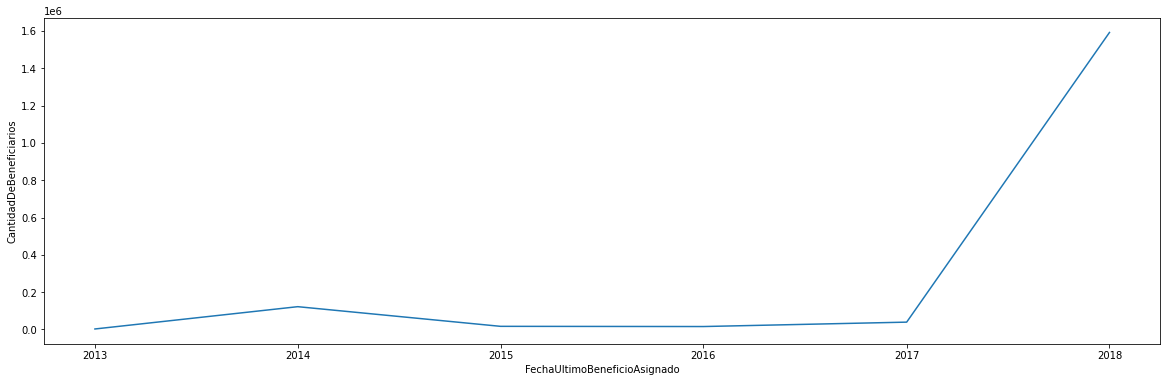

In [40]:
fig, g = plt.subplots(figsize = (20,6))
d = data.groupby('FechaUltimoBeneficioAsignado').sum('CantidadDeBeneficiarios').reset_index()
g = sns.lineplot(x="FechaUltimoBeneficioAsignado", y="CantidadDeBeneficiarios", data=d, dashes=False, ax=g)

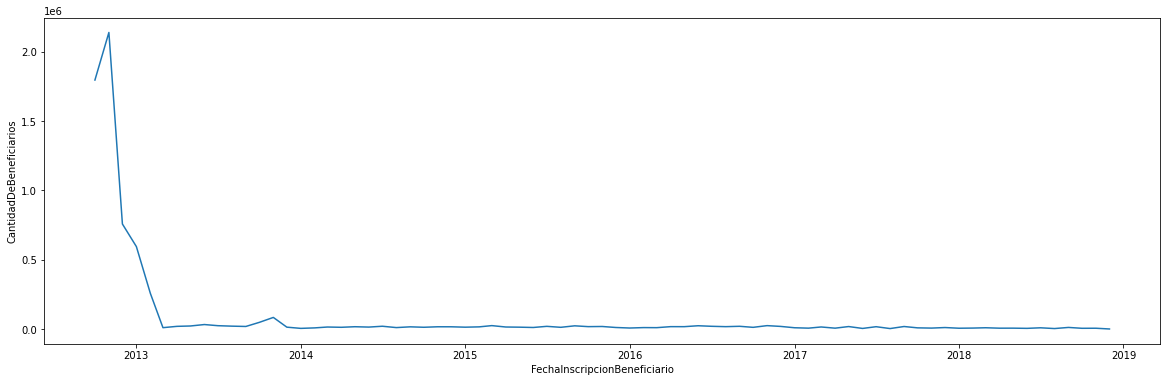

In [41]:
fig, g = plt.subplots(figsize = (20,6))
d = data.groupby('FechaInscripcionBeneficiario').sum('CantidadDeBeneficiarios').reset_index()
g = sns.lineplot(x="FechaInscripcionBeneficiario", y="CantidadDeBeneficiarios", data=d, dashes=False, ax=g)


In [47]:
CrosstabResult=pd.crosstab(index=data['NivelEscolaridad'],columns=data['TipoBeneficio'],values=data["CantidadDeBeneficiarios"],aggfunc=sum)
#print(CrosstabResult)
#from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
#ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
#print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
CrosstabResult

TipoBeneficio,EDUCACIÓN PRIMARIA,EDUCACIÓN PRIMARIANUTRICIÓN,EDUCACIÓN PRIMARIANUTRICIÓN MENOR,EDUCACIÓN SECUNDARIA,EDUCACIÓN SECUNDARIANUTRICIÓN,NUTRICIÓN,NUTRICIÓN MENOR,TRANSICIÓN,TRANSICIÓNNUTRICIÓN MENOR
NivelEscolaridad,,,,,,,,,
POSGRADO,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
PREGRADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PRIMARIA,1117565.0,21.0,8735.0,67.0,0.0,21.0,979.0,1040.0,410.0
SECUNDARIA,2212.0,0.0,0.0,1159610.0,557.0,86.0,0.0,0.0,0.0
TECNICO,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
TECNOLOGO,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
TRANSICION,25.0,0.0,0.0,0.0,0.0,0.0,2184.0,53804.0,84540.0


In [48]:
relGenero = data.groupby('Genero').size() / data.shape[0] 
relEscola = data.groupby('NivelEscolaridad').size() / data.shape[0] 
relBancar = data.groupby('Bancarizado').size() / data.shape[0] 
relDiscap = data.groupby('Discapacidad').size() / data.shape[0] 
relEstado = data.groupby('EstadoBeneficiario').size() / data.shape[0] 
relEtnia = data.groupby('Etnia').size() / data.shape[0] 
relDepart = data.groupby('DepartamentoAtencion').size() / data.shape[0] 
relTipBen = data.groupby('TipoBeneficio').size() / data.shape[0] 
relTipDoc = data.groupby('TipoDocumento').size() / data.shape[0] 
relTipPob = data.groupby('TipoPoblacion').size() / data.shape[0] 
relRanCon = data.groupby('RangoBeneficioConsolidadoAsignado').size() / data.shape[0] 
relRanEdad = data.groupby('RangoEdad').size() / data.shape[0] 
relTitular = data.groupby('Titular').size() / data.shape[0] 

<AxesSubplot:ylabel='TipoPoblacion'>

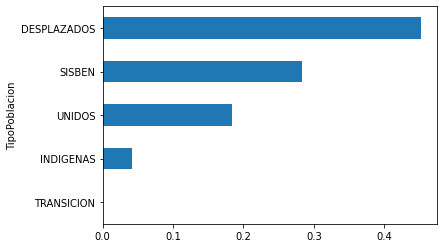

In [49]:
relTipPob.sort_values().plot.barh()

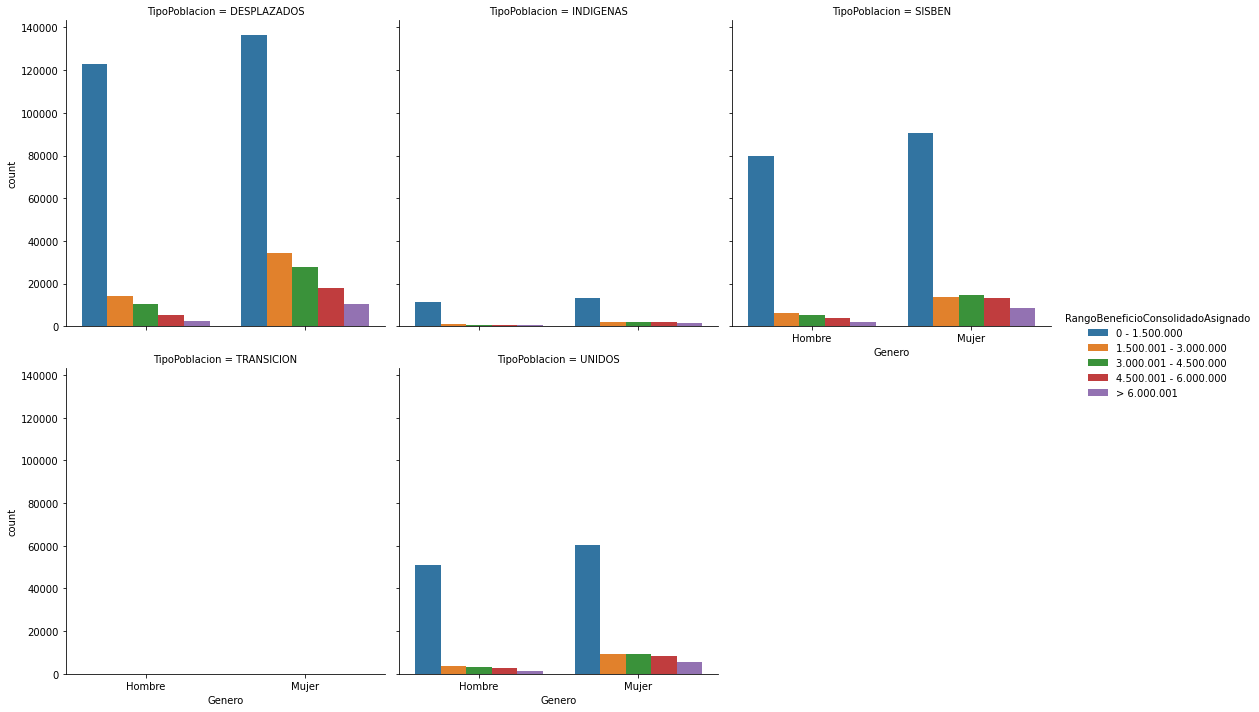

In [50]:
g = sns.catplot(x="Genero", hue="RangoBeneficioConsolidadoAsignado", col="TipoPoblacion",
                data=data, kind="count", col_wrap=3);

In [51]:
df2 = pd.pivot_table(data,index='TipoBeneficio',columns='RangoEdad',values="CantidadDeBeneficiarios",aggfunc=np.sum)

df2

RangoEdad,00-05,06-17,18-29,30-49,50-65,>65
TipoBeneficio,,,,,,
EDUCACIÓN PRIMARIA,7.0,1148228.0,57866.0,40.0,7.0,16.0
EDUCACIÓN PRIMARIANUTRICIÓN,0.0,0.0,27.0,0.0,0.0,0.0
EDUCACIÓN PRIMARIANUTRICIÓN MENOR,0.0,18936.0,6.0,2.0,0.0,0.0
EDUCACIÓN SECUNDARIA,10.0,357335.0,929611.0,53.0,7.0,31.0
EDUCACIÓN SECUNDARIANUTRICIÓN,0.0,1.0,715.0,3.0,0.0,1.0
NUTRICIÓN,3.0,112.0,50857.0,210313.0,16915.0,2389.0
NUTRICIÓN MENOR,38385.0,267124.0,23.0,11.0,0.0,3.0
TRANSICIÓN,0.0,57031.0,24.0,0.0,0.0,0.0
TRANSICIÓNNUTRICIÓN MENOR,0.0,91762.0,7.0,5.0,1.0,0.0


In [52]:
df = pd.pivot_table(data,index='TipoBeneficio',columns='Genero',values="CantidadDeBeneficiarios",aggfunc=np.sum)

df

Genero,Hombre,Mujer
TipoBeneficio,,
EDUCACIÓN PRIMARIA,623200.0,582964.0
EDUCACIÓN PRIMARIANUTRICIÓN,0.0,27.0
EDUCACIÓN PRIMARIANUTRICIÓN MENOR,9082.0,9862.0
EDUCACIÓN SECUNDARIA,612020.0,675027.0
EDUCACIÓN SECUNDARIANUTRICIÓN,29.0,691.0
NUTRICIÓN,40652.0,239937.0
NUTRICIÓN MENOR,154973.0,150573.0
TRANSICIÓN,30773.0,26282.0
TRANSICIÓNNUTRICIÓN MENOR,46597.0,45178.0


In [53]:
df = pd.pivot_table(data,index='RangoEdad',columns='NivelEscolaridad',values="CantidadDeBeneficiarios",aggfunc=np.sum)

df

NivelEscolaridad,POSGRADO,PREGRADO,PRIMARIA,SECUNDARIA,TECNICO,TECNOLOGO,TRANSICION
RangoEdad,,,,,,,
00-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06-17,0.0,0.0,1134409.0,359761.0,0.0,0.0,142771.0
18-29,0.0,0.0,30493.0,889403.0,14.0,11.0,18.0
30-49,1.0,0.0,81.0,94.0,20.0,5.0,1.0
50-65,1.0,1.0,54.0,28.0,5.0,0.0,1.0
>65,0.0,0.0,14.0,9.0,2.0,0.0,0.0


In [54]:
data.groupby('DepartamentoAtencion').sum('CantidadDeBeneficiarios').reset_index()[['DepartamentoAtencion','CantidadDeBeneficiarios']].sort_values(by='CantidadDeBeneficiarios')

,DepartamentoAtencion,CantidadDeBeneficiarios
31,97 - VAUPES,2667.0
32,99 - VICHADA,3370.0
29,94 - GUAINIA,5441.0
27,88 - SAN ANDRES,6095.0
28,91 - AMAZONAS,14791.0
30,95 - GUAVIARE,20700.0
17,63 - QUINDIO,46939.0
24,81 - ARAUCA,59009.0
25,85 - CASANARE,76596.0
26,86 - PUTUMAYO,82951.0


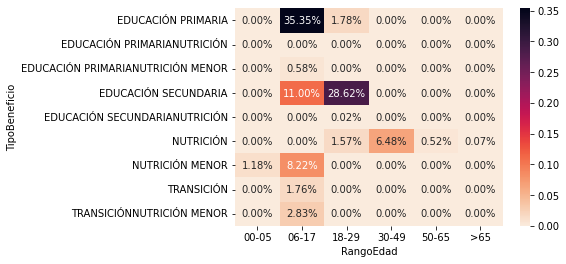

In [55]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['RangoEdad'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

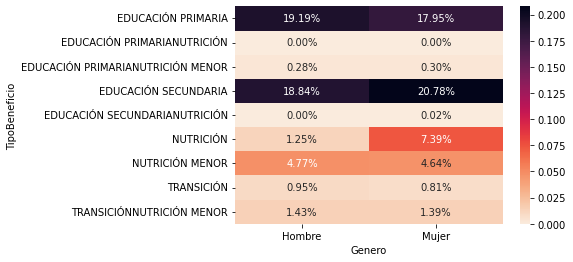

In [56]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['Genero'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

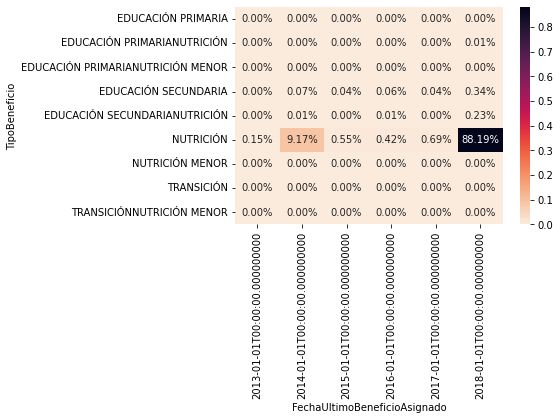

In [57]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['FechaUltimoBeneficioAsignado'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

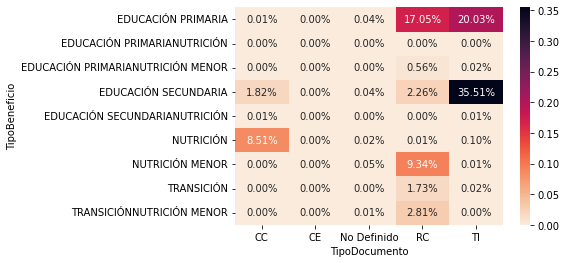

In [58]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['TipoDocumento'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

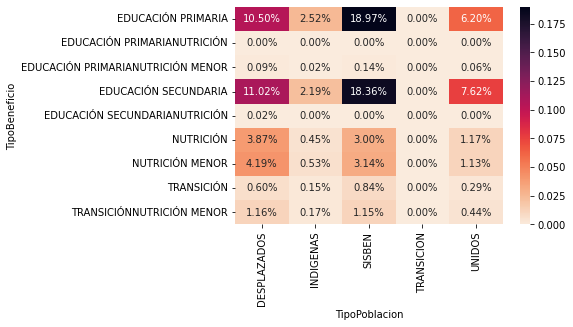

In [59]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['TipoPoblacion'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

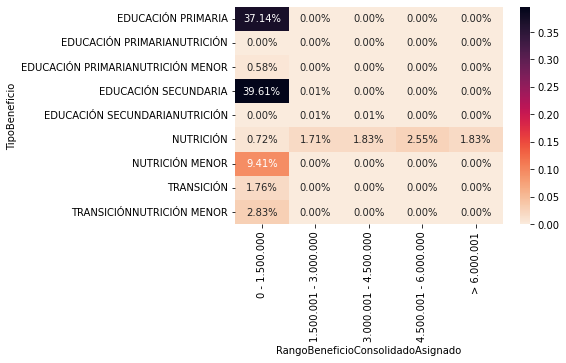

In [60]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['RangoBeneficioConsolidadoAsignado'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

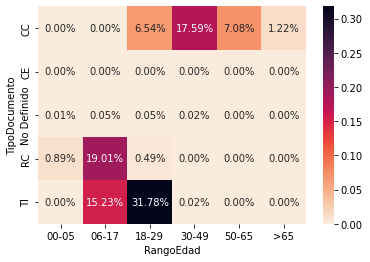

In [61]:
cr=pd.crosstab(index=data['TipoDocumento'],columns=data['RangoEdad'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

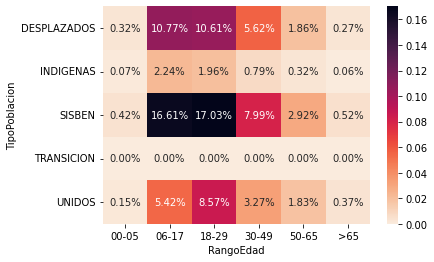

In [62]:
cr=pd.crosstab(index=data['TipoPoblacion'],columns=data['RangoEdad'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

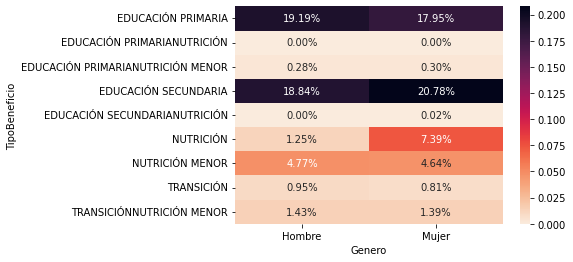

In [63]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['Genero'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

In [64]:
df2 = pd.pivot_table(data,index='TipoBeneficio',columns='RangoEdad',values="CantidadDeBeneficiarios",aggfunc=np.sum)

print(df2)

RangoEdad                            00-05      06-17     18-29     30-49  \
TipoBeneficio                                                               
EDUCACIÓN PRIMARIA                     7.0  1148228.0   57866.0      40.0   
EDUCACIÓN PRIMARIANUTRICIÓN            0.0        0.0      27.0       0.0   
EDUCACIÓN PRIMARIANUTRICIÓN MENOR      0.0    18936.0       6.0       2.0   
EDUCACIÓN SECUNDARIA                  10.0   357335.0  929611.0      53.0   
EDUCACIÓN SECUNDARIANUTRICIÓN          0.0        1.0     715.0       3.0   
NUTRICIÓN                              3.0      112.0   50857.0  210313.0   
NUTRICIÓN MENOR                    38385.0   267124.0      23.0      11.0   
TRANSICIÓN                             0.0    57031.0      24.0       0.0   
TRANSICIÓNNUTRICIÓN MENOR              0.0    91762.0       7.0       5.0   

RangoEdad                            50-65     >65  
TipoBeneficio                                       
EDUCACIÓN PRIMARIA                     7.0    

In [65]:
df = pd.pivot_table(data,index='TipoBeneficio',columns='Genero',values="CantidadDeBeneficiarios",aggfunc=np.sum)

df

Genero,Hombre,Mujer
TipoBeneficio,,
EDUCACIÓN PRIMARIA,623200.0,582964.0
EDUCACIÓN PRIMARIANUTRICIÓN,0.0,27.0
EDUCACIÓN PRIMARIANUTRICIÓN MENOR,9082.0,9862.0
EDUCACIÓN SECUNDARIA,612020.0,675027.0
EDUCACIÓN SECUNDARIANUTRICIÓN,29.0,691.0
NUTRICIÓN,40652.0,239937.0
NUTRICIÓN MENOR,154973.0,150573.0
TRANSICIÓN,30773.0,26282.0
TRANSICIÓNNUTRICIÓN MENOR,46597.0,45178.0


<AxesSubplot:ylabel='TipoBeneficio'>

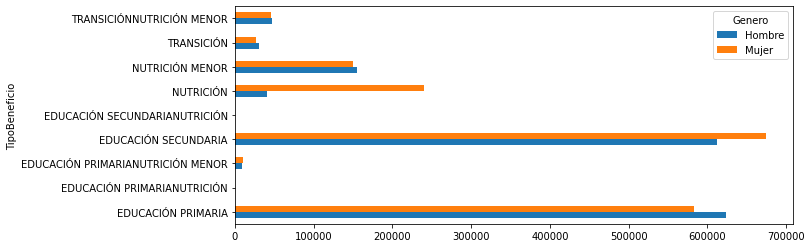

In [66]:
df.plot.barh(figsize= (10,4))

In [67]:
d= data.groupby('NivelEscolaridad').sum('CantidadDeBeneficiarios').reset_index()
d[['NivelEscolaridad','CantidadDeBeneficiarios']].sort_values(by='CantidadDeBeneficiarios',ascending=False)


,NivelEscolaridad,CantidadDeBeneficiarios
3,SECUNDARIA,1249295.0
2,PRIMARIA,1165051.0
6,TRANSICION,142791.0
4,TECNICO,41.0
5,TECNOLOGO,16.0
0,POSGRADO,2.0
1,PREGRADO,1.0


In [68]:
d= data.groupby('Etnia').sum('CantidadDeBeneficiarios').reset_index()
d[['Etnia','CantidadDeBeneficiarios']].sort_values(by='CantidadDeBeneficiarios',ascending=False)

,Etnia,CantidadDeBeneficiarios
1,INDIGENA,377649.0
0,AFROCOLOMBIANO,255133.0
2,MESTIZO,8362.0
5,ROM,2698.0
4,RAIZAL,2058.0
3,PALENQUERO,1864.0


In [91]:
data2=data[['Etnia','TipoPoblacion','NivelEscolaridad','Genero','rango_idh','Rango_cant_ben']]
data2['Etnia_agrup'] = data2['Etnia'].apply(lambda x: 'Si' if x != 'ND' else x)  
data2['Etnia']

/tmp/ipykernel_1638/2433724528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Etnia_agrup'] = data2['Etnia'].apply(lambda x: 'Si' if x != 'ND' else x)


0         AFROCOLOMBIANO
1         AFROCOLOMBIANO
2         AFROCOLOMBIANO
3         AFROCOLOMBIANO
4         AFROCOLOMBIANO
               ...      
842960               NaN
842961               NaN
842962               NaN
842963               NaN
842964               NaN
Name: Etnia, Length: 842965, dtype: category
Categories (6, object): ['AFROCOLOMBIANO', 'INDIGENA', 'MESTIZO', 'PALENQUERO', 'RAIZAL', 'ROM']

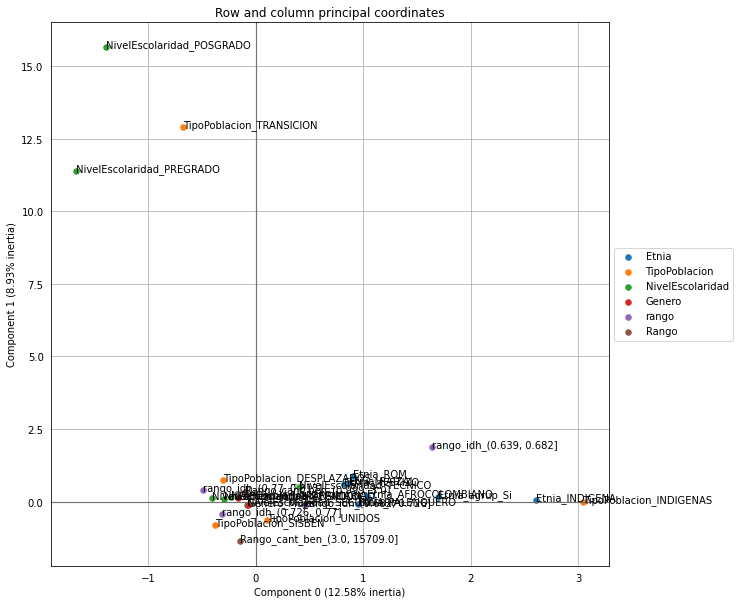

In [92]:
mca = prince.MCA()        
churn_mca = mca.fit(data2)

ax = churn_mca.plot_coordinates(
        X=data2,
        ax=None,
        figsize=(10, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Preprocesamiento basado en hallazgos

## Outliers

## Agregación

## Muestreo

## Discretización

### Binning CantidadDeBeneficiarios

In [89]:
data['Rango_cant_ben'] = pd.qcut(data['CantidadDeBeneficiarios'],4,duplicates='drop')

## Reducción de dimensionalidad

In [90]:
data.Rango_cant_ben

0         (0.999, 3.0]
1         (0.999, 3.0]
2         (0.999, 3.0]
3         (0.999, 3.0]
4         (0.999, 3.0]
              ...     
842960    (0.999, 3.0]
842961    (0.999, 3.0]
842962    (0.999, 3.0]
842963    (0.999, 3.0]
842964    (0.999, 3.0]
Name: Rango_cant_ben, Length: 842965, dtype: category
Categories (2, interval[float64]): [(0.999, 3.0] < (3.0, 15709.0]]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c166f790-79e3-4b78-86ae-d8397ad8412c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>